# Parte 1 - Instalando TensorFlow y Keras

In [ ]:
!pip install tensorflow
!pip install keras

# Parte 2 - Imports

In [0]:
from sklearn.datasets import make_blobs

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#Parte 3 - Helper Functions

In [0]:
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

Esta función, es una variante de la que se proporciona como ejemplo en scikit-learn.   
Ttraza un contorno del límite en lugar de una sola línea para que pueda ver la confianza de la predicción.

In [0]:
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

#Parte 4 - Creando Red Neuronal, Entrenando y Visualizando Resultados

Llamo a make_blobs para crear datos a partir de la cantidad de puntos de datos definido en el parámetro de contorno.

El parámetro center = 2 le dice al functino que devuelva dos clústeres de datos, un clúster para la clase 1 y otro para la clase 0.

La matriz x contiene las coordenadas de cada punto de datos y la matriz x contienen la clase 0 o 1 del punto de datos.

In [0]:
X, y = make_blobs(n_samples=1000,\
    centers=2, random_state=42)

Tracemos estas distribuciones para asegurarnos de que parezcan razonables.

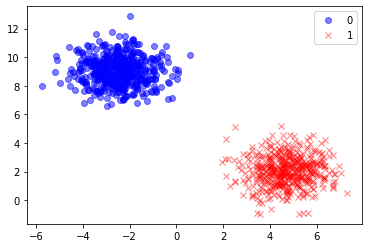

In [0]:
p1 = plot_data(plt, X, y)
p1.show()

#Descripción de la Gráfica.

Aquí están nuestros grupos, se ven agradables y fácilmente separables.

Así que no necesito mucha red para averiguar cómo definir el límite entre los dos.

En general, cualquier distribución de datos que sea linealmente separable, es decir, entre la que se puede poner un plano, se puede realizar sin necesidad de capas ocultas en una red neuronal.

Así que definiré nuestra red neuronal inicial sin capas ocultas y agregaré las capas ocultas más tarde si necesito que se separen los datos de cada grupo.

Ahora, voy a dividir la data en dos datasets, uno para entrenamiento y otro para testing.

Entrenaré el modelo con los datos de entrenamiento y luego evaluaré el rendimiento del modelo con los datos de prueba.

Por lo tanto, definiré nuestra red neuronal inicial sin "hidden layers" y las agregaré más adelante si las necesito para separar los datos de cada grupo.

Ahora dividiré los datos en conjuntos de datos de prueba y entrenamiento.

In [0]:
from sklearn.model_selection import train_test_split

Al establecer el tamaño de la prueba en 0.3, estoy colocando el 30% de los datos en los
arreglos X_test e y_test, y el 70% restante va en los arreglos X_train e y_train.

También configuro el inicializador de random_state para asegurarnos de que podamos
producir la misma división si ejecutamos el código varias veces.

In [0]:
X_train, X_test, \
y_train, y_test = \
    train_test_split(\
        X, y, test_size=0.3,\
            random_state=42)

De Keras, importaré el modelo secuencial y la capa densa (dense_layer).

En la capa densa, cada neurona está conectada a cada neurona en
la siguiente capa, o hacia la salida, si no hay un seguimiento
capa.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Luego importo el optimizador de Adam, que empleará propagación hacia atrás (back propagation) 
para ajustar los pesos y sesgos para minimizar el
error durante el entrenamiento.

In [0]:
from tensorflow.keras.optimizers import Adam

El patrón general para el modelo secuencial es:

1. crear model >> el cual crea el modelo secuencial

2. Añadir layers >> desde los inputs hasta los outpus

3. Compilar el modelo

4. Entrenar el modelo >> con data de prueba

5. Evaluar modelo >> mide el rendimiento del modelo contra la data de prueba y validación.

Este es un modelo simple en el que cada capa se inserta al final de
la red, y obtiene la entrada de las capas anteriores o de los datos pasados en el caso de la primera capa.

In [0]:
model = Sequential()

Ahora necesito agregar nuestra primera, y en este ejemplo, única capa.

Esta es una capa densa que entrenaré para dividir las dos clases
de datos.

Especifico que la capa densa contiene solo una neurona, que
será si los datos pertenecen a la clase 0 o la clase 1.

Espero dos valores, las posiciones X y Y, para cada dato
entonces puedo establecer la forma de entrada en "2,": una matriz unidimensional de dos elementos.

In [0]:
model.add(Dense(\
         1, input_shape=(2,),\
         activation="sigmoid"))

d 
Defino el proceso de aprendizaje del modelo llamando al método de compilación.

Especifico el optimizador de Adam para minimizar la pérdida, que indica con qué frecuencia
el modelo predice incorrectamente la clase.

Y la función binary_crossentropy se usa para calcular la pérdida,
y que la precisión es una métrica que queremos optimizar.

In [0]:
model.compile(Adam(\
                  learning_rate=0.05),\
                  'binary_crossentropy',\
                  metrics=['accuracy'])

Con el modelo definido, utilizo el método de ajuste para corregir el peso y
sesgo en el modelo para minimizar la pérdida.

Hago esto, ejecutando el conjunto de entrenamiento a través del método de ajuste, un número específico de veces.

Cada análisis de los datos se denomina "epoch".

Por lo tanto, definiendo en 100 los "epochs", estoy haciendo 100 ejecuciones en los datos de entrenamiento.

Y en cada ejecución, el optimizador ajustará la red para minimizar
la pérdida y aumentar la precisión.

In [0]:
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.000022/22 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 2/10
 1/22 [>.............................] - ETA: 0s - loss: 6.5602e-04 - accuracy: 1.000022/22 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 3/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0010 - accuracy: 1.000022/22 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0015 - accuracy: 1.000022/22 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/10
 1/22 [>.............................] - ETA: 0s - loss: 4.8792e-04 - accuracy: 1.000022/22 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0045 - accuracy: 1.000022/22 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.000022/22 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.000022/22 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
 1/22 [>.............................] - ETA: 0s - loss: 0.0013 - accuracy: 1.000022/22 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/10
 1/22 [>.............................] - ETA: 0s - loss: 6.2153e-04 - accuracy: 1.000022/22 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Out[27]: <keras.callbacks.History at 0x7f3b317d7160>

Una vez entrenado el modelo, utilizo el método de evaluación para evaluar
qué tan bien mi modelo predice la clase de las ubicaciones y el conjunto de datos de prueba.

In [0]:
eval_result = model.evaluate(X_test, y_test)

1/10 [==>...........................] - ETA: 1s - loss: 4.8330e-04 - accuracy: 1.000010/10 [==============================] - 0s 1ms/step - loss: 5.2130e-04 - accuracy: 1.0000

Imprimo los resultados de esta evaluación como valores numéricos de pérdida y precisión.

In [0]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

Test loss: 0.0005212995456531644 Test accuracy: 1.0

Y solo para que sea más fácil de entender, trazaré la decisión.
límite del modelo que he aprendido.

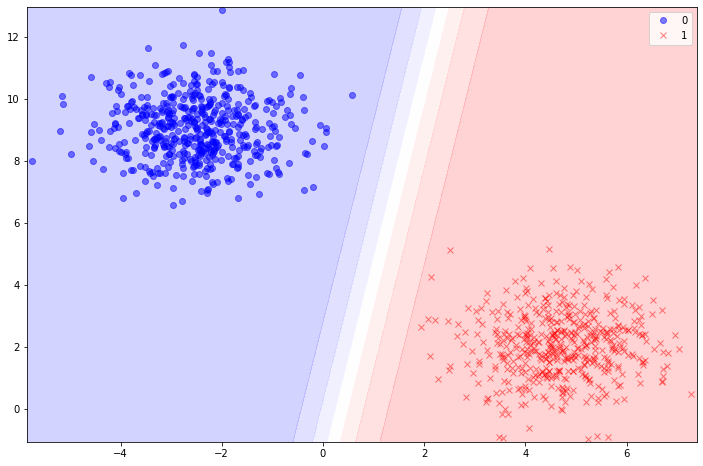

In [0]:
plot_decision_boundary(model, X, y).show()